# Chapter  : Plotting and Visualization

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## A Brief matplotlib API Primer

- Python has many add-on libraries for making static or dynamic visualizations, but I’ll be mainly focused on matplotlib and libraries that build on top of it.

- matplotlib is a desktop plotting package designed for creating plots and figures suitable for publication.  

- matplotlib supports various GUI backends on all operating systems and additionally can export visualizations to all of the common vector and raster graphics formats (PDF, SVG, JPG, PNG, BMP, GIF, etc.).

- Over time, matplotlib has spawned a number of add-on toolkits for data visualization that use matplotlib for their underlying plotting. One of these is seaborn, which will be explore later in this chapter. 

In [2]:
import matplotlib.pyplot as plt

What is Pyplot?

> matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation

In [3]:
%matplotlib inline

Generating visualizations with pyplot is very quick:

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

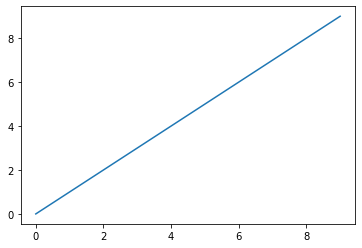

In [5]:
plt.plot(data);

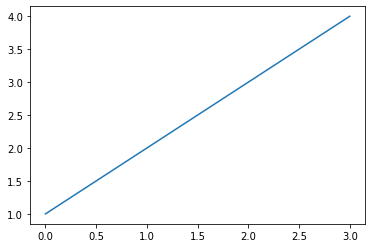

In [6]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.show()

- You may be wondering why the x-axis ranges from 0-3 and the y-axis from 1-4. 

- If you provide a single list or array to plot, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. 

- Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are [0, 1, 2, 3].

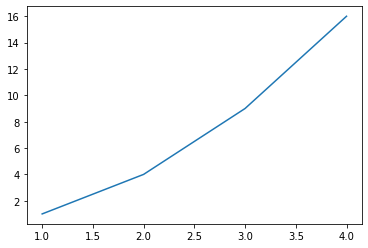

In [7]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16]);

> While libraries like seaborn and pandas's built-in plotting functions will deal with many of the mundane details of making plots, should you wish to customize them beyond the function options provided, you will need to learn a bit about the matplotlib API.

### Figures and Subplots

- Plots in matplotlib reside within a Figure object. 

- You can create a new figure with plt.figure

In [8]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

> In IPython, if you first run %matplotlib to set up the matplotlib integration, an empty plot window will appear, but in Jupyter nothing will be shown until we use a few more commands.

- plt.figure has a number of options; notably, figsize will guarantee the figure has a certain size and aspect ratio if saved to disk.

- You can’t make a plot with a blank figure. You have to create one or more subplots using add_subplot:

In [9]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

> One nuance of using Jupyter notebooks is that plots are reset after each cell is evaluated, so you must put all of the plotting commands in a single notebook cell.

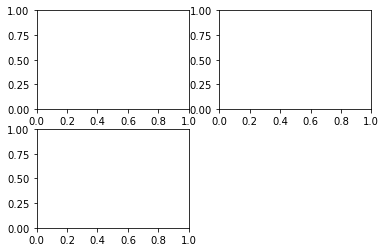

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

- These plot axis objects have various methods which creates different types of plots, and it is prefered to use the axis methods over the top level plotting functions like plt.plot.

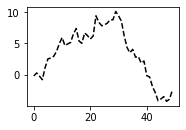

In [11]:
fig = plt.figure()
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(np.random.standard_normal(50).cumsum(), color="black",
                linestyle="dashed");

> You may notice output like <matplotlib.lines.Line2D at ...> when you run this. matplotlib returns objects that reference the plot subcomponent that was just added. A lot of the time you can safely ignore this output, or you can put a semicolon at the end of the line to suppress the output.

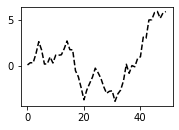

In [12]:
fig = plt.figure()
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(np.random.standard_normal(50).cumsum(), color="black",
                linestyle="dashed");

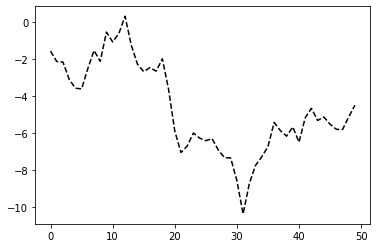

In [13]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

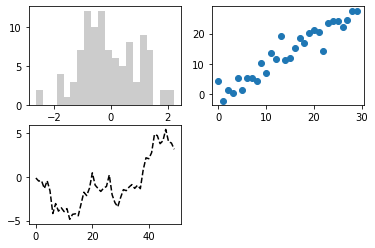

In [14]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.2)

ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30));

ax3.plot(np.random.standard_normal(50).cumsum(), color="black",
                linestyle="dashed");

In [15]:
np.random.standard_normal(30)  * 3

array([ 0.3108, -4.4872, -3.5247,  7.842 , -2.0679, -2.255 ,  1.9088,
       -3.4729,  1.844 ,  3.0642,  2.0048, -2.4286, -2.7244,  4.5369,
        0.2854,  3.554 ,  1.9111, -1.6178, -0.1653, -3.4078, -0.5115,
       -3.4743,  3.3138,  1.9027,  3.7791,  2.8948, -1.3033, -2.6388,
       -2.0845,  3.6791])

In [16]:
np.arange(30)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [17]:
np.arange(30) + 3 * np.random.standard_normal(30)

array([ 1.3718,  1.3471,  5.0421, -0.405 ,  3.2099,  8.9193,  1.1675,
        3.9201, 11.7247,  8.5297,  2.6527,  7.8982, 16.7986, 14.4222,
       14.454 , 13.3735, 14.5735, 17.3192, 14.0753, 25.5196, 21.6937,
       20.4286, 19.2492, 20.0726, 30.6369, 25.2218, 31.4558, 22.2554,
       25.6769, 30.6588])

> The style option alpha=0.3 sets the transparency of the plot overlaid.

In [18]:
plt.close('all')

### Subplots

> This utility wrapper makes it convenient to create common layouts of subplots, including the enclosing figure object, in a single call.

To make creating a grid of subplots more convenient, matplotlib includes a method plt.subplots that creates a new figure and returns a NumPy array containing the created subplot objects:

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

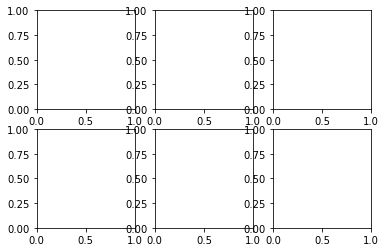

In [19]:
fig, axes = plt.subplots(2, 3) # Number of rows/columns of the subplot grid
axes

Example

Text(0.5, 1.0, 'Simple plot')

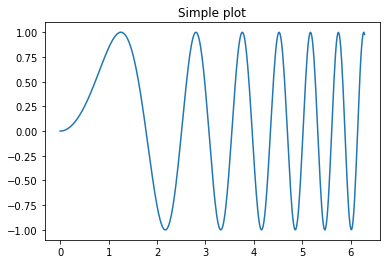

In [20]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

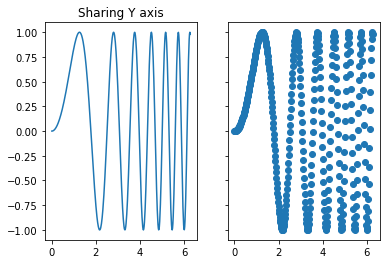

In [21]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)

ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

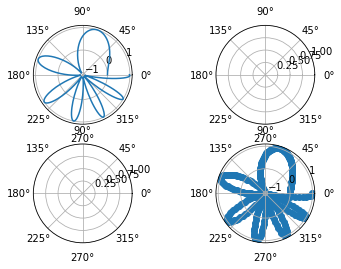

In [22]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

#### Indexing Axis of Subplots

- The axes array can then be indexed like a two-dimensional array; for example, axes[0, 1] refers to the subplot in the top row at the center. Y



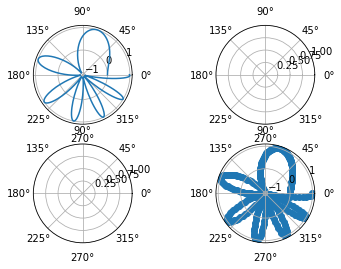

In [23]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

In [24]:
axs[0,0]

<PolarAxesSubplot:>

### Colors, Markers, and Line Styles

- Most kinds of plot decorations can be accessed through methods on matplotlib axes objects. 

- This includes methods like xlim, xticks, and xticklabels. 
  
- These control the plot range, tick locations, and tick labels, respectively. They can be used in two ways:

    - Called with no arguments returns the current parameter value (e.g., ax.xlim() returns the current x-axis plotting range)

    - Called with parameters sets the parameter value (e.g., ax.xlim([0, 10]), sets the x-axis range to 0 to 10)


> All such methods act on the active or most recently created AxesSubplot. Each of them corresponds to two methods on the subplot object itself; in the case of xlim these are ax.get_xlim and ax.set_xlim.

#### Setting the title, axis labels, ticks, and ticklabels

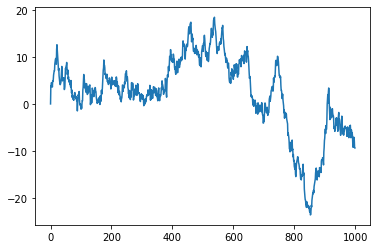

In [25]:
fig, ax = plt.subplots()

ax.plot(np.random.standard_normal(1000).cumsum());

- To change the x-axis ticks, it’s easiest to use set_xticks and set_xticklabels. 

- The former instructs matplotlib where to place the ticks along the data range; by default these locations will also be the labels. But we can set any other values as the labels using set_xticklabels:

- set_xlabel gives a name to the x-axis and 
  
- set_title the subplot title 

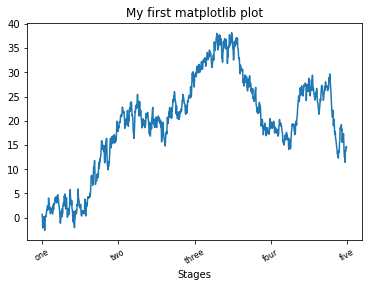

In [26]:
fig, ax = plt.subplots()

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                           rotation=30, fontsize=8)

ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot")

# modify y axis
ax.plot(np.random.standard_normal(1000).cumsum());

- Modifying the y-axis consists of the same process, substituting y for x in the above. 

- The axes class has a set method that allows batch setting of plot properties. From the prior example, we could also have written:


In [27]:
ax.set(title="My first matplotlib plot", xlabel="Stages")

[Text(0.5, 1.0, 'My first matplotlib plot'),
 Text(0.5, 17.200000000000003, 'Stages')]

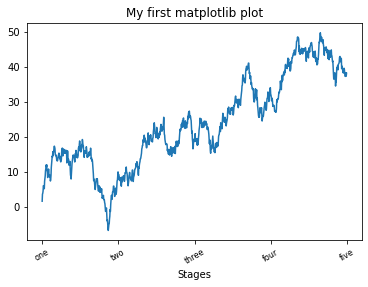

In [28]:
fig, ax = plt.subplots()

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                           rotation=30, fontsize=8)

ax.set(title="My first matplotlib plot", xlabel="Stages")

# modify y axis
ax.plot(np.random.standard_normal(1000).cumsum());

### Adding legends

- Legends are another critical element for identifying plot elements. 

- There are a couple of ways to add one. The easiest is to pass the label argument when adding each piece of the plot:

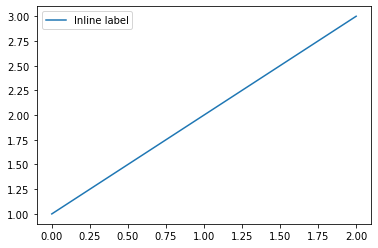

In [29]:
fig, ax = plt.subplots()

ax.plot([1, 2, 3], label='Inline label')
ax.legend()


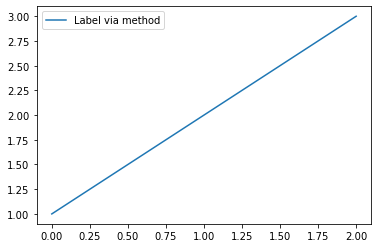

In [30]:
fig, ax = plt.subplots()

line, = ax.plot([1, 2, 3])
line.set_label('Label via method')
ax.legend()

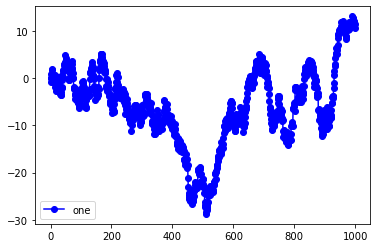

In [31]:
fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(), marker='o', color="blue", label="one");

# ax.plot(np.random.randn(1000).cumsum(), color="red", 'go-', label= "two");

# ax.plot(np.random.randn(1000).cumsum(), color="black", 'go-',label="three");

ax.legend( loc = "lower left" )



- You can call ax.legend(loc='upper left') to place the legend in a specific location. 

- The loc legend option tells matplotlib where to place the plot. The default is "best", which tries to choose a location that is most out of the way. To exclude one or more elements from the legend, pass no label or label="_nolegend_".

> The strings 'upper left', 'upper right', 'lower left', 'lower right' place the legend at the corresponding corner of the axes/figure

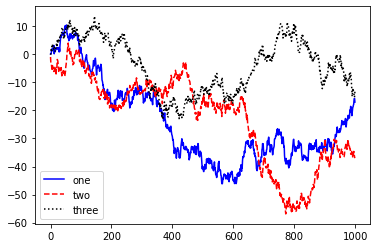

In [32]:
fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(), color="blue", label="one");

ax.plot(np.random.randn(1000).cumsum(), color="red", linestyle="dashed", label= "two");

ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted",label="three");

ax.legend(loc= 'best')

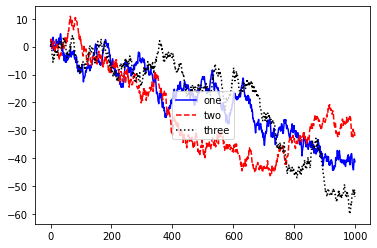

In [33]:
fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(), color="blue", label="one");

ax.plot(np.random.randn(1000).cumsum(), color="red", linestyle="dashed", label= "two");

ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted",label="three");

ax.legend(loc= "center")

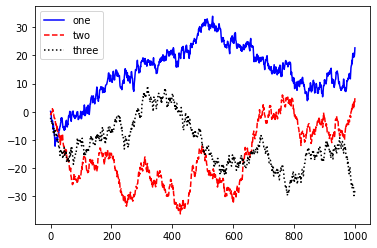

In [34]:
fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(), color="blue", label="one");

ax.plot(np.random.randn(1000).cumsum(), color="red", linestyle="dashed", label= "two");

ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted",label="three");

ax.legend(loc= "best")

[Text(0.5, 0, 'Ratings'), Text(0, 0.5, 'Number of Occurances')]

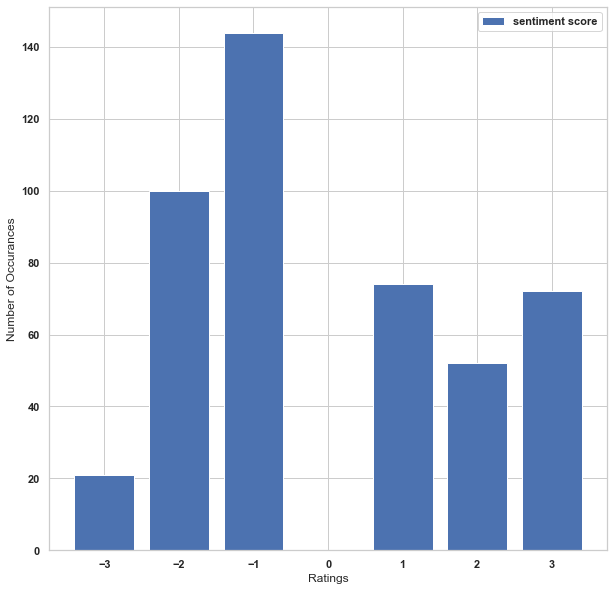

In [80]:
fig, ax = plt.subplots()

x = np.array([-3,-2,-1,1,2,3])
y = np.array([21, 100, 144,74, 52, 72])

ax.bar(x,y, label='sentiment score');
ax.legend(loc= "best")
ax.set(xlabel="Ratings", ylabel="Number of Occurances")


The location can also be a 2-tuple giving x, y coordinates in figure fraction coordinates.

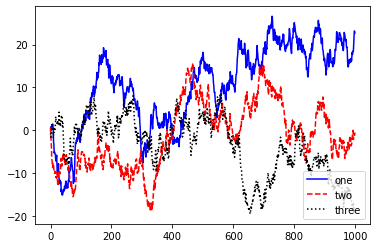

In [36]:
fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(), color="blue", label="one");

ax.plot(np.random.randn(1000).cumsum(), color="red", linestyle="dashed", label= "two");

ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted",label="three");

ax.legend(loc= 4)

[More about legend location options:](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)

### Annotations and Drawing on a Subplot

- In addition to the standard plot types, you may wish to draw your own plot annotations, which could consist of text, arrows, or other shapes. 

- You can add annotations and text using the text, arrow, and annotate functions. 

- text draws text at given coordinates (x, y) on the plot with optional custom styling:

In [37]:
ax.text(x, y, "Hello world!",
        family="monospace", fontsize=10)

Text([-3 -2 -1  1  2  3], [ 21 100 144  74  52  72], 'Hello world!')

- Annotations can draw both text and arrows arranged appropriately. 

- As an example, let’s plot the closing S&P 500 index price since 2007 (obtained from Yahoo! Finance) and annotate it with some of the important dates from the 2008–2009 financial crisis. 


Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

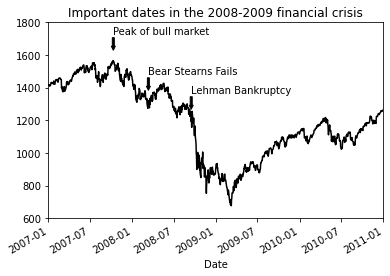

In [38]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("examples/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]


spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

# Zoom in on 2007-2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis")

### Saving Plots to File


- You can save the active figure to file using the figure object’s savefig instance method. For example, to save an SVG version of a figure, you need only type:



In [39]:
fig.savefig("figpath.pdf")

> The file type is inferred from the file extension. So if you used .pdf instead, you would get a PDF. 



### matplotlib Configuration

- matplotlib comes configured with color schemes and defaults that are geared primarily toward preparing figures for publication. 

- Fortunately, nearly all of the default behavior can be customized via global parameters governing figure size, subplot spacing, colors, font sizes, grid styles, and so on. 
  
- One way to modify the configuration programmatically from Python is to use the rc method; for example, to set the global default figure size to be 10 × 10, you could enter:

In [40]:
plt.rc("figure", figsize=(10, 10))


- The first argument to rc is the component you wish to customize, such as "figure", "axes", "xtick", "ytick", "grid", "legend", or many others. 

- After that can follow a sequence of keyword arguments indicating the new parameters. 

- A convenient way to write down the options in your program is as a dictionary:



In [41]:
plt.rc("font", family="monospace", weight="bold", size=8)

> All of the current configuration settings are found in the plt.rcParams dictionary, and they can be restored to default values by calling the plt.rcdefaults() function.



In [42]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which':

## Plotting with pandas and seaborn

- matplotlib can be a fairly low-level tool. 

- You assemble a plot from its base components: the data display (i.e., the type of plot: line, bar, box, scatter, contour, etc.), legend, title, tick labels, and other annotations.

- In pandas we may have multiple columns of data, along with row and column labels. 

- pandas itself has built-in methods that simplify creating visualizations from DataFrame and Series objects. 

- Another library is seaborn, a high level statistical graphics library built on matplotlib. Seaborn simplifies creating many common visualization types.



### Line Plots

- Series and DataFrame each have a plot attribute for making some basic plot types. By default, plot() makes line plots 



In [43]:
plt.close('all')

In [44]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0     2.517698
10    3.280288
20    3.657464
30    3.300616
40    2.404773
50    3.524322
60    3.378893
70    3.554186
80    2.437866
90    3.478796
dtype: float64

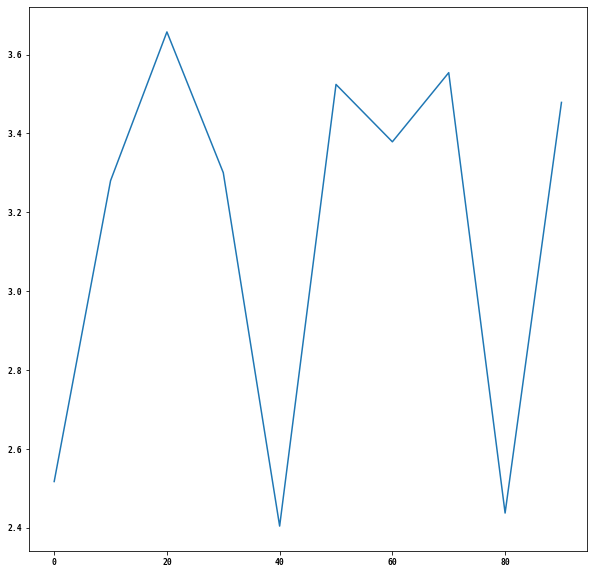

In [45]:
s.plot();

- The Series object’s index is passed to matplotlib for plotting on the x-axis, though you can disable this by passing use_index=False. 

- The x-axis ticks and limits can be adjusted with the xticks and xlim options, and y-axis respectively with yticks and ylim.



> DataFrame’s plot method plots each of its columns as a different line on the same subplot, creating a legend automatically 



In [46]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-0.268327,0.384931,-0.570768,0.672178
10,0.425186,1.942479,0.026080,1.528611
20,0.888255,2.850884,2.110116,1.417964
30,1.467542,4.112437,2.530590,1.270700
40,2.956897,4.777978,2.937954,1.212664
50,2.821118,5.509481,2.683704,-0.525693
60,4.368060,5.805410,2.890601,-2.296059
70,4.087616,7.436927,1.713051,-1.888133
80,4.345181,5.322432,0.025148,-1.523948
90,6.169549,6.027079,-0.671520,-1.057519


<AxesSubplot:>

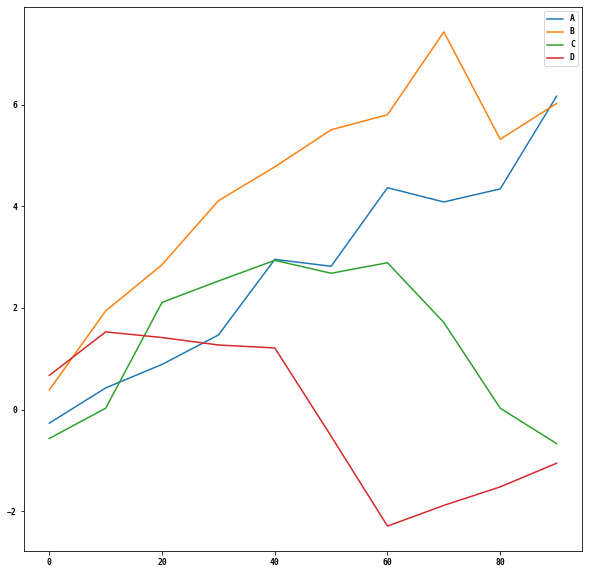

In [47]:
df.plot()

> Legend is added by default, but you can disable it by passing legend=False.

- The plot attribute contains a "family" of methods for different plot types. For example, df.plot() is equivalent to df.plot.line(). We'll explore some of these methods next.



### Bar Plots

- The plot.bar() and plot.barh() make vertical and horizontal bar plots, respectively. 

- The Series or DataFrame index will be used as the x (bar) or y (barh) ticks.



<AxesSubplot:>

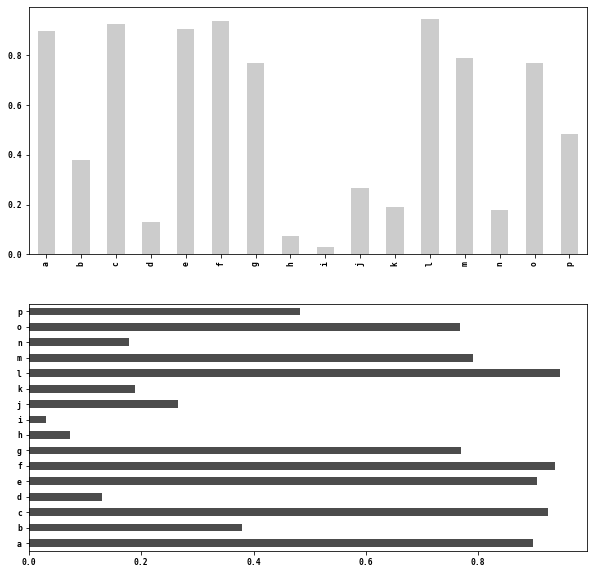

In [48]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))


data.plot.bar(ax=axes[0], color='k', alpha=0.2) # Plot using bar method

data.plot.barh(ax=axes[1], color='k', alpha=0.7) # Plot using barh method, horizontal bars

- With a DataFrame, bar plots group the values in each row together in a group in bars, side by side, for each value. See Figure 9.16:



In [49]:
np.random.seed(12348)

In [50]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


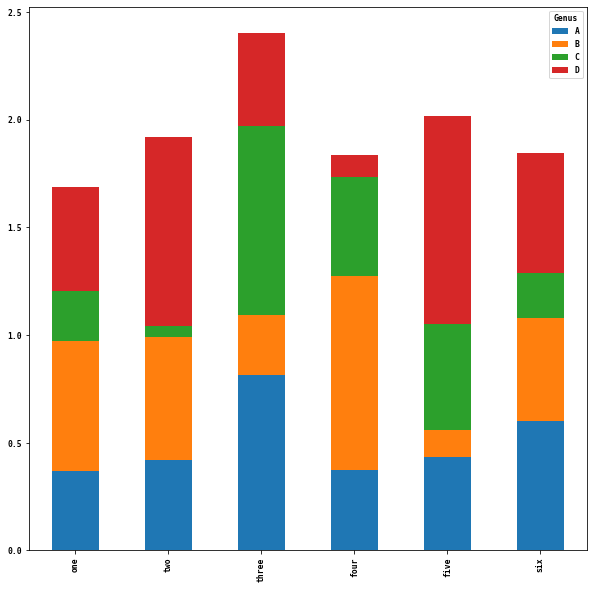

In [51]:
df.plot.bar(stacked=True);

> Note that the name “Genus” on the DataFrame’s columns is used to title the legend.



In [52]:
plt.figure()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

- We create stacked bar plots from a DataFrame by passing stacked=True, resulting in the value in each row being stacked together horizontally 



<AxesSubplot:>

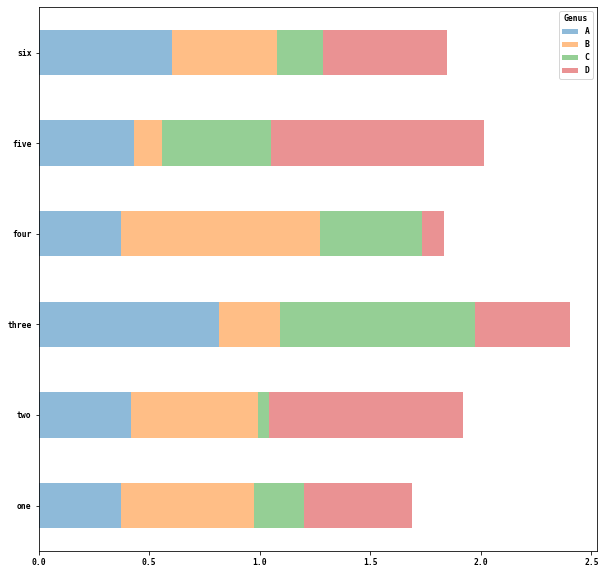

In [53]:
df.plot.barh(stacked=True, alpha=0.5)

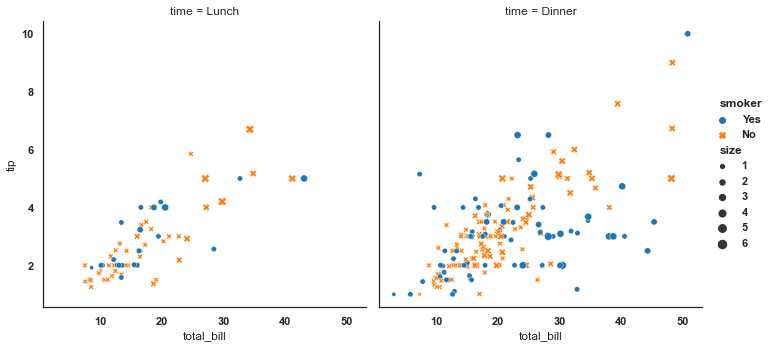

In [54]:
# Import seaborn
import seaborn as sns

# Apply the default theme
# sns.set_theme()
sns.set_theme(style="white", palette=None)


# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

In [55]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [56]:
plt.close('all')

In [57]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

<AxesSubplot:xlabel='day'>

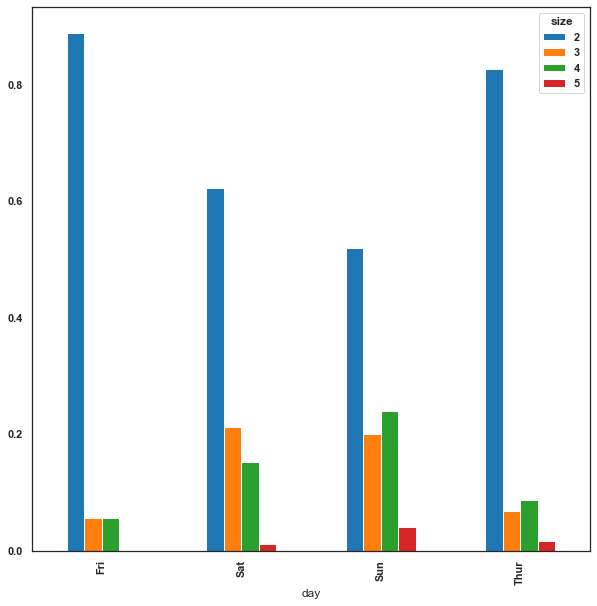

In [58]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
party_pcts.plot.bar()

In [59]:
plt.close('all')

#### Seaborn Bar Plots

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

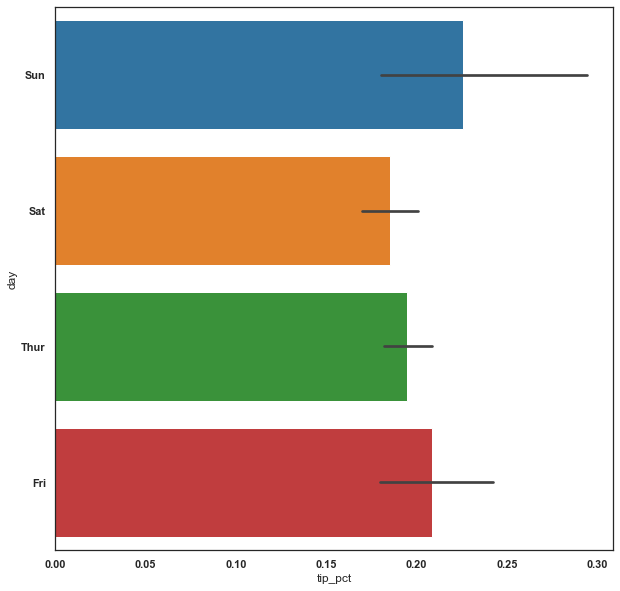

In [60]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [61]:
plt.close('all')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

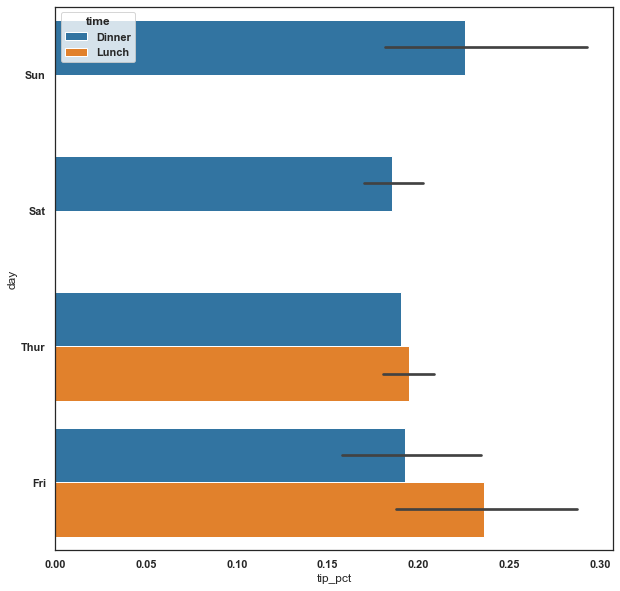

In [62]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [63]:
plt.close('all')

In [64]:
sns.set(style="whitegrid")

### Histograms and Density Plots

In [65]:
plt.figure()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='Frequency'>

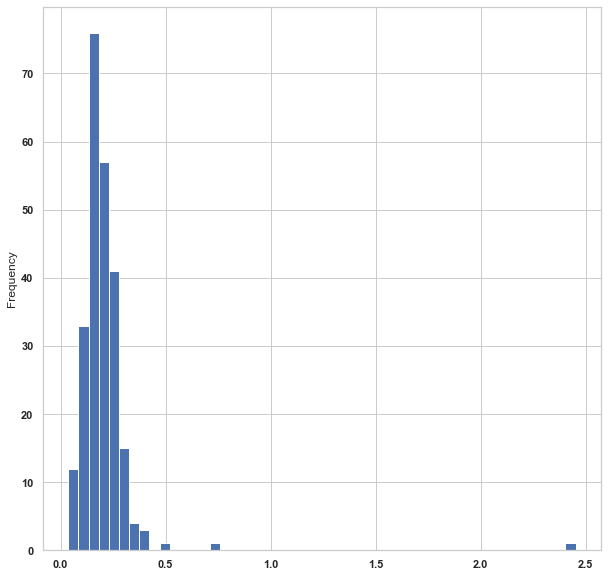

In [66]:
tips['tip_pct'].plot.hist(bins=50)

In [67]:
plt.figure()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<AxesSubplot:ylabel='Density'>

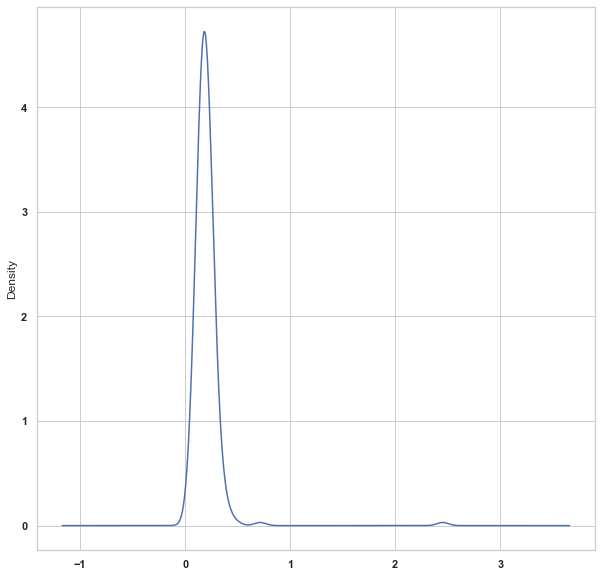

In [68]:
tips['tip_pct'].plot.density()

In [69]:
plt.figure()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

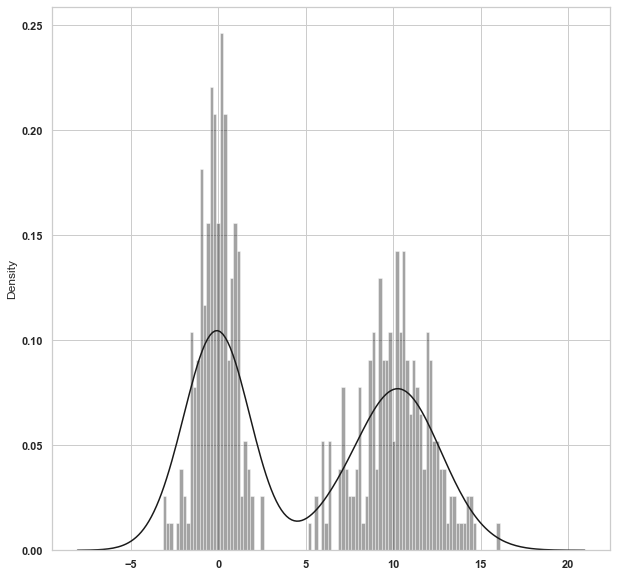

In [70]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

In [71]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [72]:
plt.figure()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

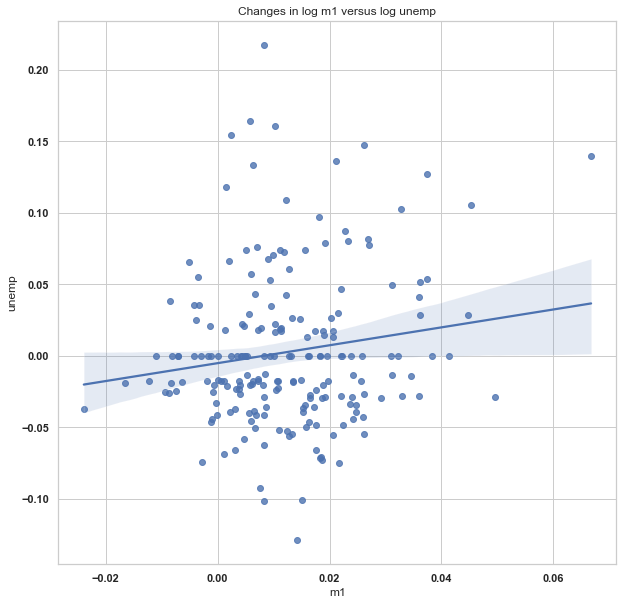

In [73]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

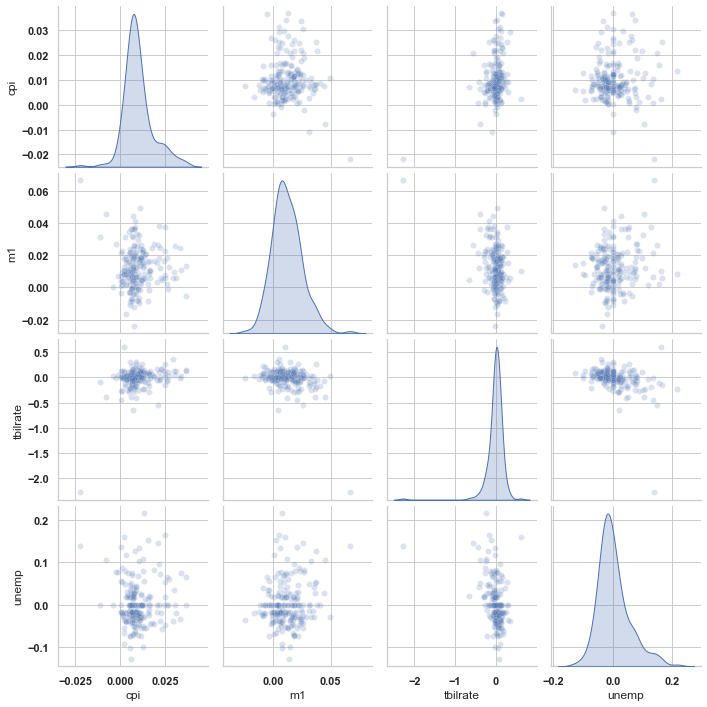

In [74]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet Grids and Categorical Data

/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


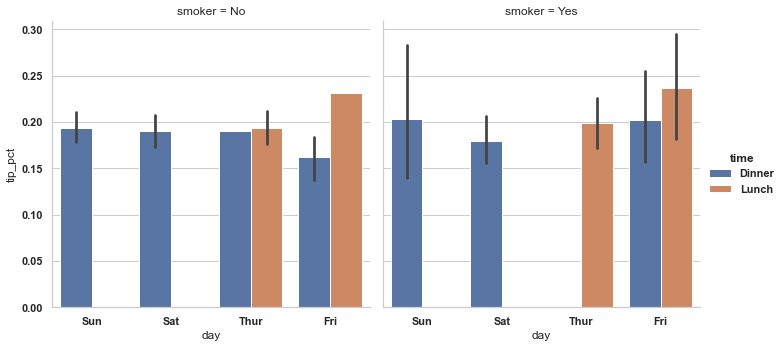

In [75]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


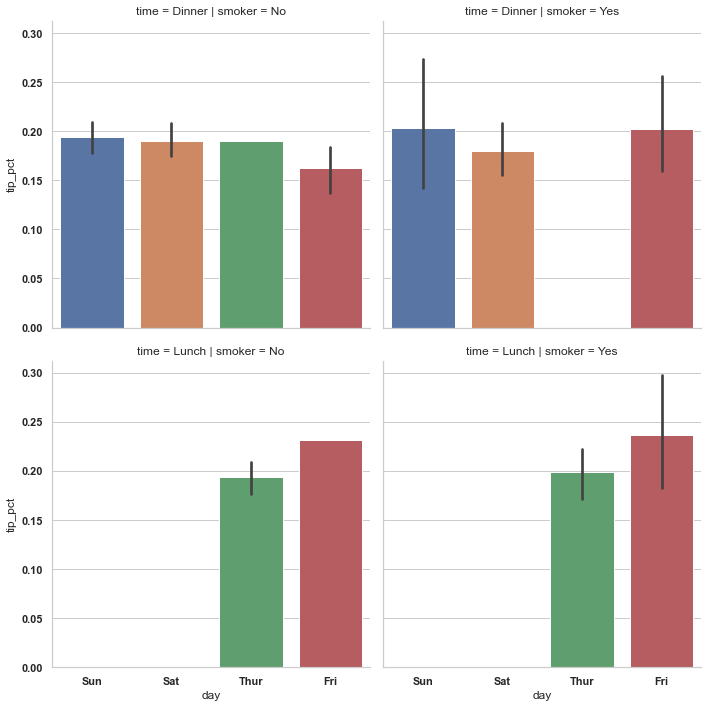

In [76]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


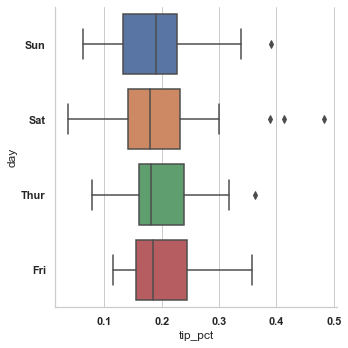

In [77]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

## Other Python Visualization Tools

In [78]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion